#機械学習　回帰

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
#※ matplotlib日本語化のためのライブラリのインストール
!pip install japanize-matplotlib

In [207]:
#各種ライブラリをインポートする
import pandas as pd
#matplotlibの日本語化
import japanize_matplotlib

#1.CSVファイルの読み込みと表示

In [208]:
#CSVファイル auto_mgp.csv を読み込む
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto_mgp.csv')

In [209]:
#読み込んだCSVファイルの先頭５行と末尾５行を表示する
df.head(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


In [210]:
df.tail(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,393,27.0,4,140.0,86.0,2790,15.6,82,1
394,394,44.0,4,97.0,52.0,2130,24.6,82,2
395,395,32.0,4,135.0,84.0,2295,11.6,82,1
396,396,28.0,4,120.0,79.0,2625,18.6,82,1
397,397,31.0,4,119.0,82.0,2720,19.4,82,1


In [211]:
#列(Unnamed: 0)を削除する
df = df.drop('Unnamed: 0', axis = 1)

#2.カテゴリ特徴量列があるときはダミー変数化

In [212]:
#ダミー変数化(Origin 1=アメ車 2=欧州車 3=日本車)
#Originをダミー変数に変更する
origin = pd.get_dummies(df['Origin'], drop_first = True)
df2 = pd.concat([df, origin], axis = 1)
df2 = df2.drop(['Origin'], axis = 1)
df2.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,2,3
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0


#3.テストデータの分離がなされている

In [213]:
from sklearn.model_selection import train_test_split
train_val, test = train_test_split(df2, test_size = 0.2, random_state = 0)

#4.正しく前処理が実装されている

# 4-1 欠損値処理の過程が実装されている

In [214]:
#欠損値の確認
train_val.isnull().any(axis=0)

MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
2               False
3               False
dtype: bool

In [215]:
#欠損値の数を求める
tmp = train_val['Horsepower'].isnull()
tmp.sum()

5

In [216]:
# Horsepower列を平均値で穴埋め
train_val["Horsepower"] = train_val["Horsepower"].fillna(train_val["Horsepower"].mean())

In [217]:
#欠損値の再確認
train_val.isnull().any(axis=0)

MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model Year      False
2               False
3               False
dtype: bool

# 4-2-1 外れ値の処理過程が理解できるように実装されている

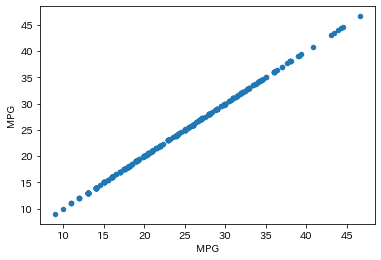

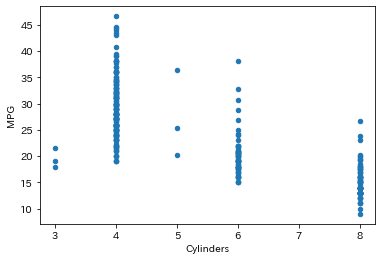

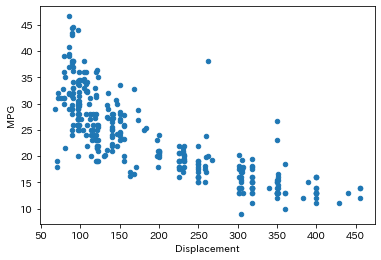

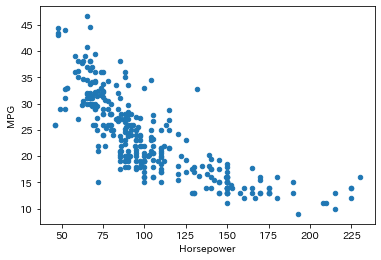

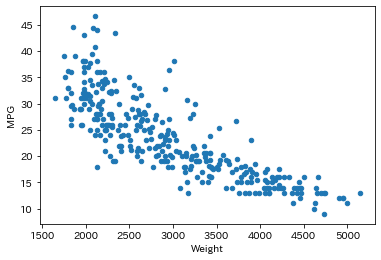

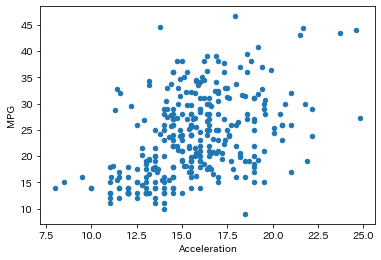

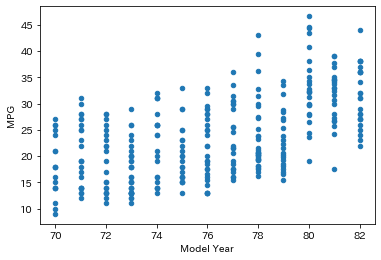

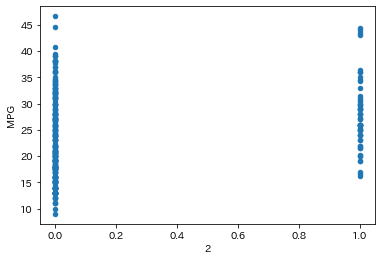

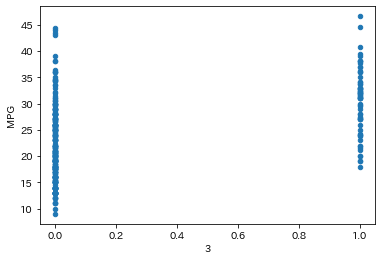

In [218]:
#各特徴量の列とMPGの列の相関関係を示す散布図を描く
colname = train_val.columns
for name in colname:
    train_val.plot(kind = 'scatter', x = name, y = 'MPG')

In [219]:
from sklearn.covariance import MinCovDet

#train_valに対して、各データの中心点からのマハラノビス距離を計算

mcd = MinCovDet(random_state=0,support_fraction=0.7)
mcd.fit(train_val)
#マハラノビス距離
distance = mcd.mahalanobis(train_val)
distance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([  5.66796767,  19.78488823,  11.5203647 ,  24.22665612,
         8.27103931,   5.46952875,   5.19559044,   4.98246685,
        50.20677521,  14.84772093,  21.06358006, 104.10183841,
        26.16417466,   9.86857792,  41.92686698,   6.73466142,
        29.47860621,  11.21809125,   6.29842923,  25.08529756,
         8.13920456,   7.86146307,   6.55032057,  10.74905514,
        11.65452887,   7.07574962,   9.78357649,  18.34355184,
         4.31277943,  12.57315156,   9.39514827,   8.59326897,
         6.76405265,   7.46293051,  10.61879568,   4.77151811,
        10.47361141,   5.40179311,   5.21222042,  38.35341581,
         9.1458022 ,  10.26241235,   9.65636392,  16.59958424,
         5.23958131,  24.05530858,   5.34907891,   6.28641255,
         6.27953194,   8.3017407 ,   6.81967407,  11.00729927,
         1.97655619,   4.1354517 ,  11.12548341,  91.10217782,
        19.41616111,   9.48401664,   8.12747363,   3.31055905,
        14.42025296,   7.58116881,   7.53629504,  24.53

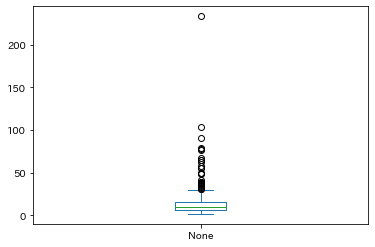

In [220]:
distance=pd.Series(distance)
distance.plot(kind="box")

In [221]:
tmp=distance.describe()#様々な基本統計量を計算
tmp

count    318.000000
mean      15.317018
std       19.025074
min        1.674188
25%        6.614277
50%        9.621718
75%       16.117661
max      233.467481
dtype: float64

In [222]:
IQR = tmp['75%'] -tmp['25%']#IQR計算
jougen = 1.5*(IQR) + tmp['75%'] # 上限値
kagen = tmp['25%'] -1.5*(IQR) # 下限値

# 上限と下限の条件をもとに、シリーズで条件検索
outliner = distance[ (distance > jougen) | (distance < kagen) ]
outliner

8       50.206775
11     104.101838
14      41.926867
39      38.353416
55      91.102178
65      32.234768
67      78.540942
68      38.961406
109     76.468633
111     56.059345
122     57.295905
128     49.451508
131     31.188849
135     38.672149
146     34.811493
147    233.467481
172     64.695567
189     37.759821
197     30.384392
225     64.418575
227     77.661631
247     48.480556
267     67.256944
271     62.196297
274     38.402818
279     37.449085
288     36.202829
293     55.382140
303     33.240368
307     37.227655
308     35.628332
309     38.006209
dtype: float64

In [223]:
no = outliner.index
no

Int64Index([  8,  11,  14,  39,  55,  65,  67,  68, 109, 111, 122, 128, 131,
            135, 146, 147, 172, 189, 197, 225, 227, 247, 267, 271, 274, 279,
            288, 293, 303, 307, 308, 309],
           dtype='int64')

In [224]:
train_val2 = train_val.drop(train_val.index[no], axis = 0)

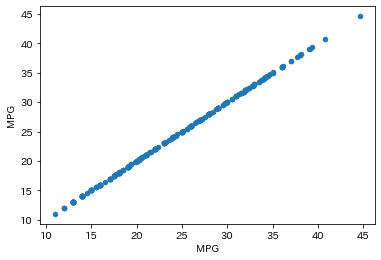

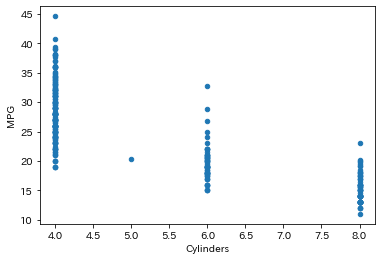

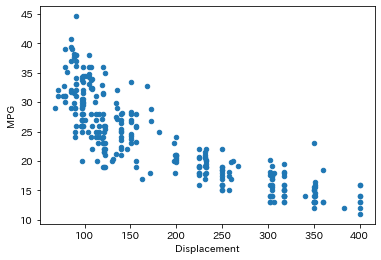

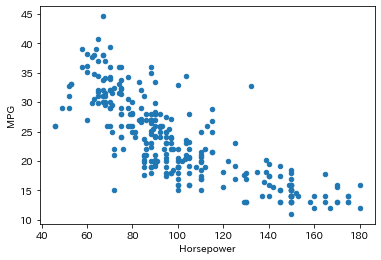

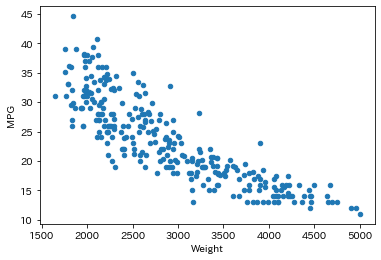

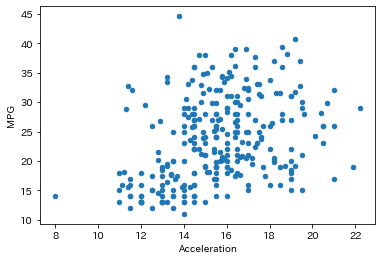

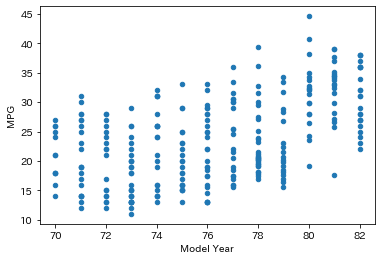

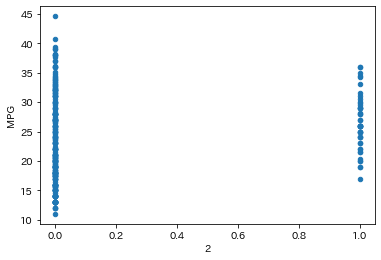

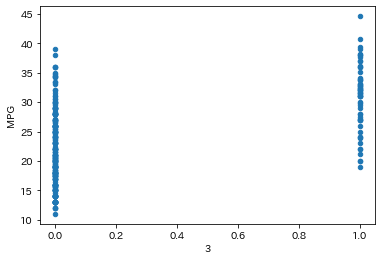

In [225]:
#各特徴量の列と家賃（円）の列の相関関係を示す散布図を描く
colname = train_val2.columns
for name in colname:
    train_val2.plot(kind = 'scatter', x = name, y = 'MPG')

In [226]:
#外れ値の削除の確認
train_val.shape

(318, 9)

In [227]:
#外れ値の削除の確認
train_val2.shape

(286, 9)

# 4-2-2 特徴量の絞り込みが理解できるように実装されている(決定係数0.5以上)
# 4-2-5 特徴量と正解の分割が実装されている

In [228]:
#特徴量の絞り込み
#列同士の相関関数を調べる
train_val2.corr()['MPG']

MPG             1.000000
Cylinders      -0.801918
Displacement   -0.840970
Horsepower     -0.798050
Weight         -0.856998
Acceleration    0.366816
Model Year      0.525862
2               0.181923
3               0.525112
Name: MPG, dtype: float64

In [229]:
#訓練データと検証データに分割する
#特徴量は相関係数が0.5以上に絞る
col =['Weight', 'Displacement', 'Cylinders', 'Horsepower', 'Model Year', 3]
x = train_val2[col]
t = train_val2[['MPG']]


In [230]:
#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

# 4-2-3 標準化が実装されている

In [231]:
#データの標準化（平均値が０、標準偏差が1にする処理）
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

# 各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x_train)
sc_x # 表示

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[ 0.93857771,  1.21686881,  1.53780659,  1.55411061, -1.12739079,
        -0.50273975],
       [-0.28535625, -0.7532366 , -0.84331329, -0.21149356, -0.27247361,
        -0.50273975],
       [ 0.88601613,  0.39338559,  0.34724665, -0.05098409,  0.29747118,
        -0.50273975],
       ...,
       [-0.3429237 ,  0.1223658 ,  0.34724665, -0.37200303, -1.69733558,
        -0.50273975],
       [-1.06001384, -0.93044185, -0.84331329, -0.59671629,  0.29747118,
        -0.50273975],
       [-1.1914178 , -1.00340872, -0.84331329, -1.0782447 ,  1.72233316,
         1.98910074]])

In [232]:
#正解データを標準化する
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

# 5.学習モデルの選択とそのモデルがなぜ選択されたかが理解できるように実装されている

In [233]:
#重回帰モデルで試します
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 6.選択された学習モデルで学習


In [234]:
model.fit(sc_x, sc_y)

LinearRegression()

# 7.正解率または決定係数の表示（未知のデータを使用して予測、判断させれば更に良い）

In [235]:
#検証データを標準化する
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
# 標準化した検証データで決定係数を計算
model.score(sc_x_val, sc_y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8798174649504961

# 4-2-2 特徴量の絞り込みが理解できるように実装されている(決定係数0.3以上で確定)

In [236]:
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

In [237]:
#決定係数0.5以上
col =['Weight', 'Displacement', 'Cylinders', 'Horsepower', 'Model Year', 3]
x = train_val2[col]
t = train_val2[['MPG']]
s1,s2 = learn(x, t)
print(s1, s2)

0.8457698120394458 0.8798174649504961


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [238]:
#決定係数0.3以上
col =['Weight', 'Displacement', 'Cylinders', 'Horsepower', 'Acceleration','Model Year', 3]
x = train_val2[col]
t = train_val2[['MPG']]
s1,s2 = learn(x, t)
print(s1, s2)

0.8490015032515191 0.8889272849329386


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# 4-2-4 多項式特徴量、交互作用特徴量が必要に応じて追加実装されている

In [239]:
# Weight列の2乗を追加
x['Weight2'] = x['Weight'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

# Cylinders列の2乗を追加
x['Cylinders2'] = x['Cylinders'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

# Displacement列の2乗を追加
x['Displacement2'] = x['Displacement'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

# Horsepower列の2乗を追加
x['Horsepower2'] = x['Horsepower'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

# Model Year列の2乗を追加
x['Model Year2'] = x['Model Year'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with d

0.8858634359821106 0.9179109885354606
0.8861684996129964 0.9186891585999262
0.8865837691266307 0.9203609539237728
0.8869824972067778 0.9209226743470779
0.8943347594298294 0.9250187799027382


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [240]:
x['W * C'] = x['Weight'] * x['Cylinders']
s1, s2 = learn(x, t)
print(s1, s2)

0.8943753833570022 0.9253641599893929


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# テストデータにて学習をさせる

In [241]:
# 訓練データと検証データを合わせて再学習させるので
# 再度、標準化する
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
model = LinearRegression()
model.fit(sc_x, sc_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [242]:
test2 = test.fillna(train_val.mean()) # 欠損値を平均値で補完

col =['Weight', 'Displacement', 'Cylinders', 'Horsepower', 'Acceleration','Model Year', 3]
x_test = test2[col]
t_test = test2[['MPG']]
x_test['Weight2'] = x_test['Weight'] ** 2
x_test['Cylinders2'] = x_test['Cylinders'] ** 2
x_test['Displacement2'] = x_test['Displacement'] ** 2
x_test['Horsepower2'] = x_test['Horsepower'] ** 2
x_test['Model Year2'] = x_test['Model Year'] ** 2
x_test['W * C'] = x_test['Weight'] * x_test['Cylinders']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [243]:
sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(t_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


#重回帰モデルでは、訓練データは89%、検証データ92%、テストデータは88%

In [244]:
model.score(sc_x_test, sc_y_test)

0.8833106487971147

# リッジ回帰は、訓練データ86%、検証データ90%、テストデータ84%

In [245]:
#リッジ回帰で試します
from sklearn.linear_model import Ridge # モジュールインポート

In [246]:
def learn2(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # 学習
    ridgeModel = Ridge(alpha = 10)
    ridgeModel.fit(sc_x_train, sc_y_train) # 学習
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = ridgeModel.score(sc_x_train, sc_y_train)
    val_score = ridgeModel.score(sc_x_val, sc_y_val)
    return train_score, val_score


In [247]:
#決定係数0.3以上
col =['Weight', 'Displacement', 'Cylinders', 'Horsepower', 'Acceleration','Model Year', 3]
x = train_val2[col]
t = train_val2[['MPG']]
s1,s2 = learn2(x, t)
print(s1, s2)

0.8472320516985945 0.8889586602102506


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [248]:
# Weight列の2乗を追加
x['Weight2'] = x['Weight'] ** 2
s1, s2 = learn2(x, t)
print(s1, s2)

# Cylinders列の2乗を追加
x['Cylinders2'] = x['Cylinders'] ** 2
s1, s2 = learn2(x, t)
print(s1, s2)

# Displacement列の2乗を追加
x['Displacement2'] = x['Displacement'] ** 2
s1, s2 = learn2(x, t)
print(s1, s2)

# Horsepower列の2乗を追加
x['Horsepower2'] = x['Horsepower'] ** 2
s1, s2 = learn2(x, t)
print(s1, s2)

# Model Year列の2乗を追加
x['Model Year2'] = x['Model Year'] ** 2
s1, s2 = learn2(x, t)
print(s1, s2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8493076849689454 0.8912393970231729


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

0.8506304094868127 0.8922322555514637
0.8582561254787107 0.9005999602445466
0.8606197244421467 0.9024229058649689
0.8615543032028681 0.902944975852695


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [249]:
x['W * C'] = x['Weight'] * x['Cylinders']
s1, s2 = learn2(x, t)
print(s1, s2)

0.8618750956246325 0.9032495246067279


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [250]:
# 訓練データと検証データを合わせて再学習させるので
# 再度、標準化する
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
ridgeModel = Ridge(alpha = 10)
ridgeModel.fit(sc_x, sc_y)
ridgeModel.score(sc_x_test, sc_y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8415384797101239

# ラッソ回帰も訓練データ89%、検証データ92%、テストデータ81%

---



In [251]:
from sklearn.linear_model import Lasso

In [252]:
def learn3(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # ラッソ回帰のモデル作成（alphaは正則化項につく定数）
    lassoModel = Lasso(alpha = 0.1)
    lassoModel.fit(sc_x_train, sc_y_train)
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = lassoModel.score(sc_x_train, sc_y_train)
    val_score = lassoModel.score(sc_x_val, sc_y_val)
    
    return train_score, val_score


In [253]:
#決定係数0.3以上
col =['Weight', 'Displacement', 'Cylinders', 'Horsepower', 'Acceleration','Model Year', 3]
x = train_val2[col]
t = train_val2[['MPG']]
s1,s2 = learn3(x, t)
print(s1, s2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8267081230548337 0.8575934327186046


In [254]:
# Weight列の2乗を追加
x['Weight2'] = x['Weight'] ** 2
s1, s2 = learn3(x, t)
print(s1, s2)

# Cylinders列の2乗を追加
x['Cylinders2'] = x['Cylinders'] ** 2
s1, s2 = learn3(x, t)
print(s1, s2)

# Displacement列の2乗を追加
x['Displacement2'] = x['Displacement'] ** 2
s1, s2 = learn3(x, t)
print(s1, s2)

# Horsepower列の2乗を追加
x['Horsepower2'] = x['Horsepower'] ** 2
s1, s2 = learn3(x, t)
print(s1, s2)

# Model Year列の2乗を追加
x['Model Year2'] = x['Model Year'] ** 2
s1, s2 = learn3(x, t)
print(s1, s2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with d

0.8267081230548337 0.8575934327186046
0.8267081230548337 0.8575934327186046
0.8267081230548337 0.8575934327186046
0.8267081230548337 0.8575934327186046
0.8279202684746643 0.8592159632156404


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [255]:
x['W * C'] = x['Weight'] * x['Cylinders']
s1, s2 = learn(x, t)
print(s1, s2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8943753833570022 0.9253641599893929


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [256]:
# 訓練データと検証データを合わせて再学習させるので
# 再度、標準化する
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
lassoModel = Lasso(alpha = 0.1)
lassoModel.fit(sc_x, sc_y)
lassoModel.score(sc_x_test, sc_y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8131161702295269